<a href="https://colab.research.google.com/github/Murcha1990/ML_Course_PT/blob/main/Lecture4_Clustering%26MLSD/PT_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

На сегодняшнем семинаре будем говорить про кластеризацию и про визуализацию.
Также поговорим про метрики качества кластеризации.

Из методов кластеризации рассмотрим:
* k-means
* DBSCAN

# Кластеризация

Сгенерируем точки из трех кластеров

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.12/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +
/tmp/ipython-input-2930158719.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[...,0], X[...,1], s=50, cmap='viridis')


Text(0, 0.5, 'y')

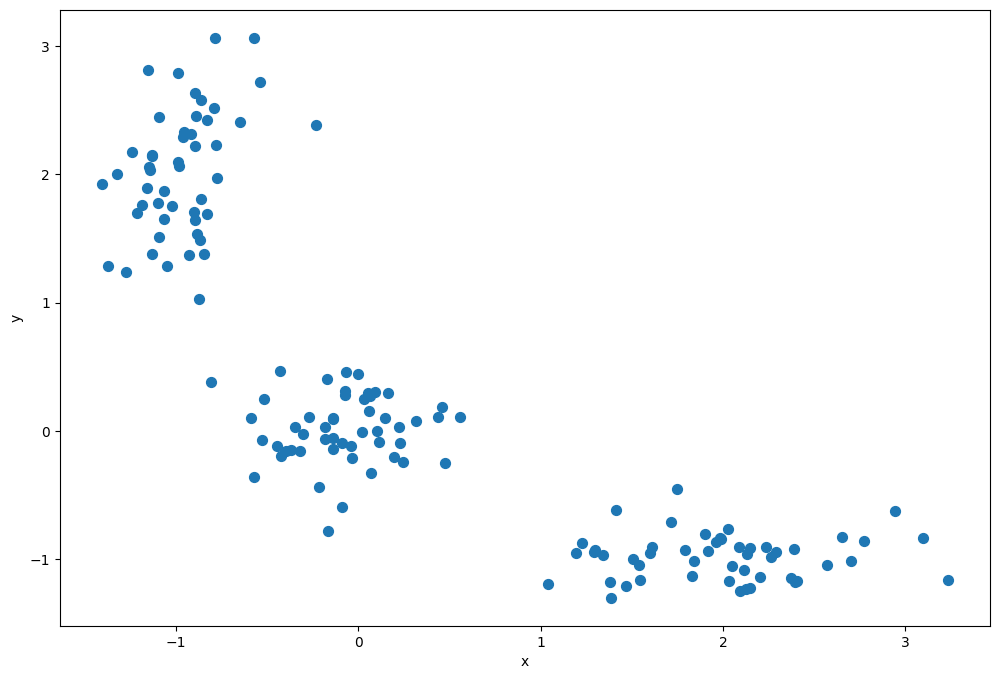

In [1]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pylab as plt
%pylab inline

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(12,8))
plt.scatter(X[...,0], X[...,1], s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Применим kmeans

In [2]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)

print(kmeans.labels_) #список из номеров кластеров для каждого объекта обучающей выборки

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
labels = kmeans.predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

Text(0, 0.5, 'y')

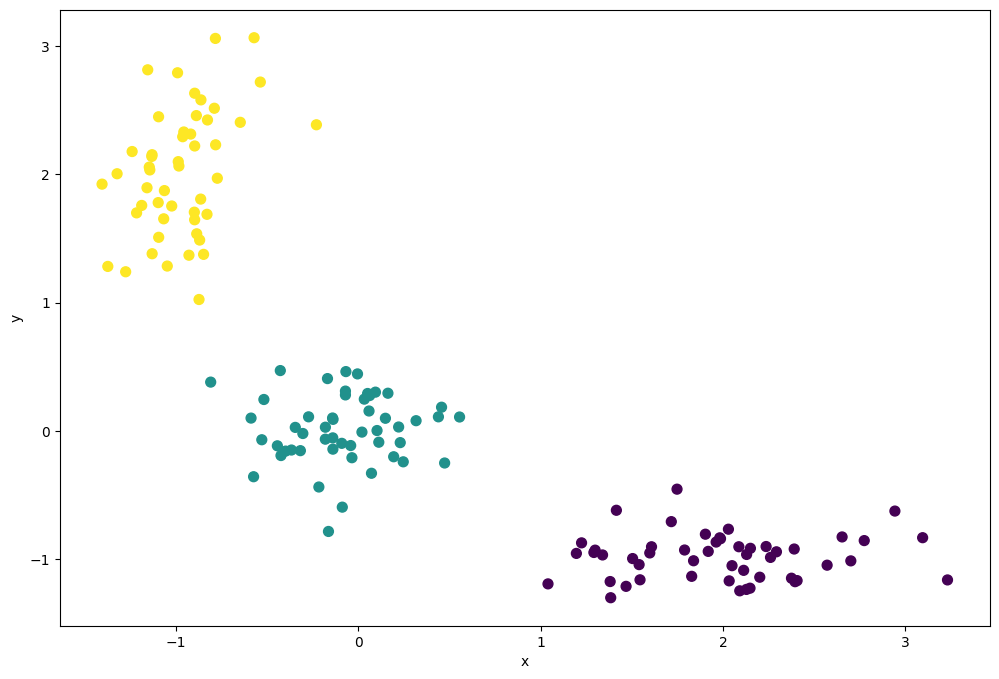

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Что произойдет, если подобрать неверное число кластеров?

n= 2 score: 0.5901161182381401
n= 3 score: 0.7210383532102965
n= 4 score: 0.6233095040369225
n= 5 score: 0.4982886877158192
n= 6 score: 0.44500415879529737
n= 7 score: 0.4308404404920235


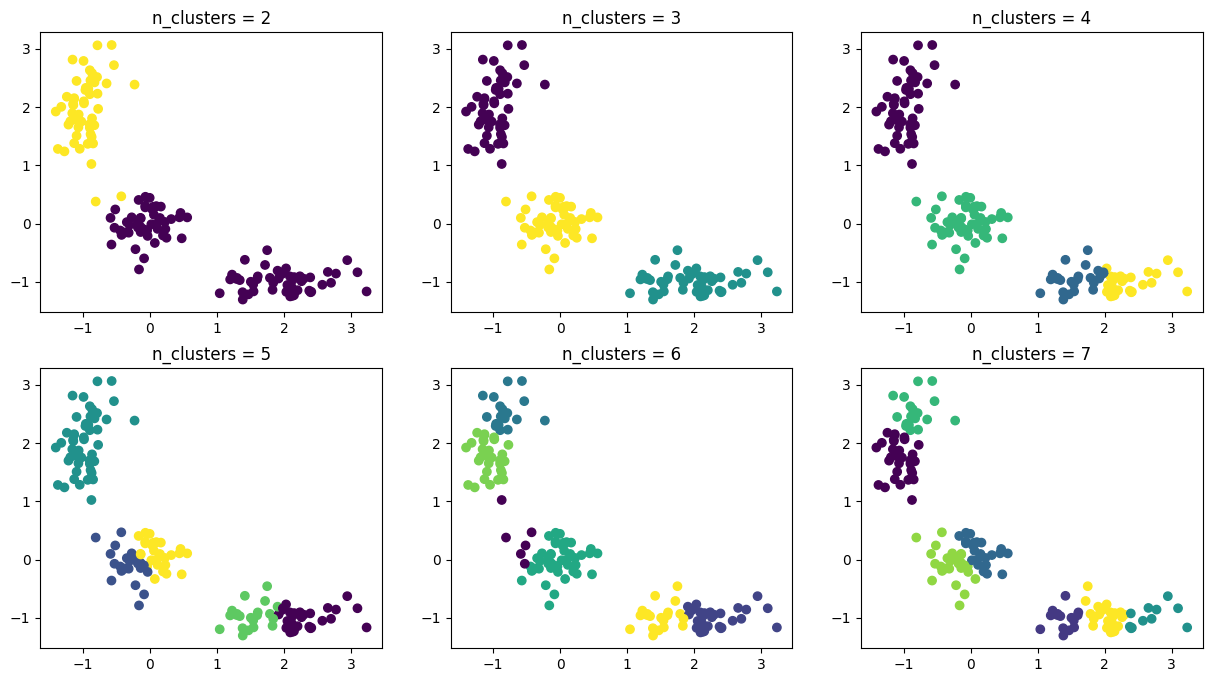

In [5]:
from sklearn.metrics import silhouette_score

plt.figure(figsize= (15,8))
for n_c in range(2,8):
    kmeans = KMeans(n_clusters = n_c)
    kmeans = kmeans.fit(X)
    clusters = kmeans.predict(X)
    plt.subplot(2,3,n_c - 1)
    plt.scatter(X[:,0], X[:,1], c = clusters)
    plt.title('n_clusters = {}'.format(n_c))
    print('n=', n_c, 'score:', silhouette_score(X, clusters))

plt.show()

## DBSCAN

(Density-based spatial clustering of applications with noise)

Это алгоритм, основанный на плотности — если дан набор объектов в некотором пространстве, алгоритм группирует вместе объекты, которые расположены близко и помечает как выбросы объекты, которые находятся в областях с малой плотностью (ближайшие соседи которых лежат далеко).

Алгоритм имеет два основных гиперпараметра:
1. `eps` &mdash; радиус рассматриваемой окрестности
2. `min_samples` &mdash; число соседей в окрестности

Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:

- Точка $p$ является основной точкой, если по меньшей мере `min_samples` точек находятся на расстоянии, не превосходящем
`eps` от неё. Говорят, что эти точки достижимы прямо из $p$.

-  Точка $q$ прямо достижима из $p$, если точка $q$ находится на расстоянии, не большем `eps`, от точки $p$, и $p$ — основная точка.
Точка $q$ достижима из $p$, если имеется путь
$p_1,…,p_n$ где $p_1=p$ и $p_n=q$ , а каждая точка $p_{i+1}$ достижима прямо из $p_i$ (все точки на пути должны быть основными, за исключением $q$).

Все точки, не достижимые из основных точек, считаются выбросами.

Теперь, если $p$ является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимыми из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.



Рассмотрим диаграмму, параметр `min_samples`=4.

Точка $A$ и другие красные точки являются основными точками, поскольку область с радиусом
`eps` , окружающая эти точки, содержит по меньшей мере 4 точки (включая саму точку). Поскольку все они достижимы друг из друга, точки образуют один кластер. Точки $B$ и $C$ основными не являются, но достижимы из $A$ (через другие основные точки), и также принадлежат кластеру. Точка $N$ является точкой шума, она не является ни основной точкой, ни доступной прямо.

<p><a href="https://commons.wikimedia.org/wiki/File:DBSCAN-Illustration.svg#/media/Файл:DBSCAN-Illustration.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/1200px-DBSCAN-Illustration.svg.png" alt="DBSCAN-Illustration.svg" width="450" height="450"> </a><br>Автор: <a href="//commons.wikimedia.org/wiki/User:Chire" title="User:Chire">Chire</a> &mdash; <span class="int-own-work" lang="ru">собственная работа</span>, <a href="https://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>

Посмотрим на результаты кластеризации при разном выборе параметров `eps` и `min_samples`.

eps= 0.1 n= 2 score: 0.0347843778897369
eps= 0.2 n= 2 score: 0.32399770480710044
eps= 0.5 n= 2 score: 0.7210383532102965
eps= 1 n= 2 score: -1
eps= 2 n= 2 score: -1
eps= 0.1 n= 4 score: -0.2976606629676489
eps= 0.2 n= 4 score: 0.41883462219259066
eps= 0.5 n= 4 score: 0.7210383532102965
eps= 1 n= 4 score: -1
eps= 2 n= 4 score: -1
eps= 0.1 n= 8 score: -1
eps= 0.2 n= 8 score: 0.2560594297167042
eps= 0.5 n= 8 score: 0.6301598303225734
eps= 1 n= 8 score: -1
eps= 2 n= 8 score: -1


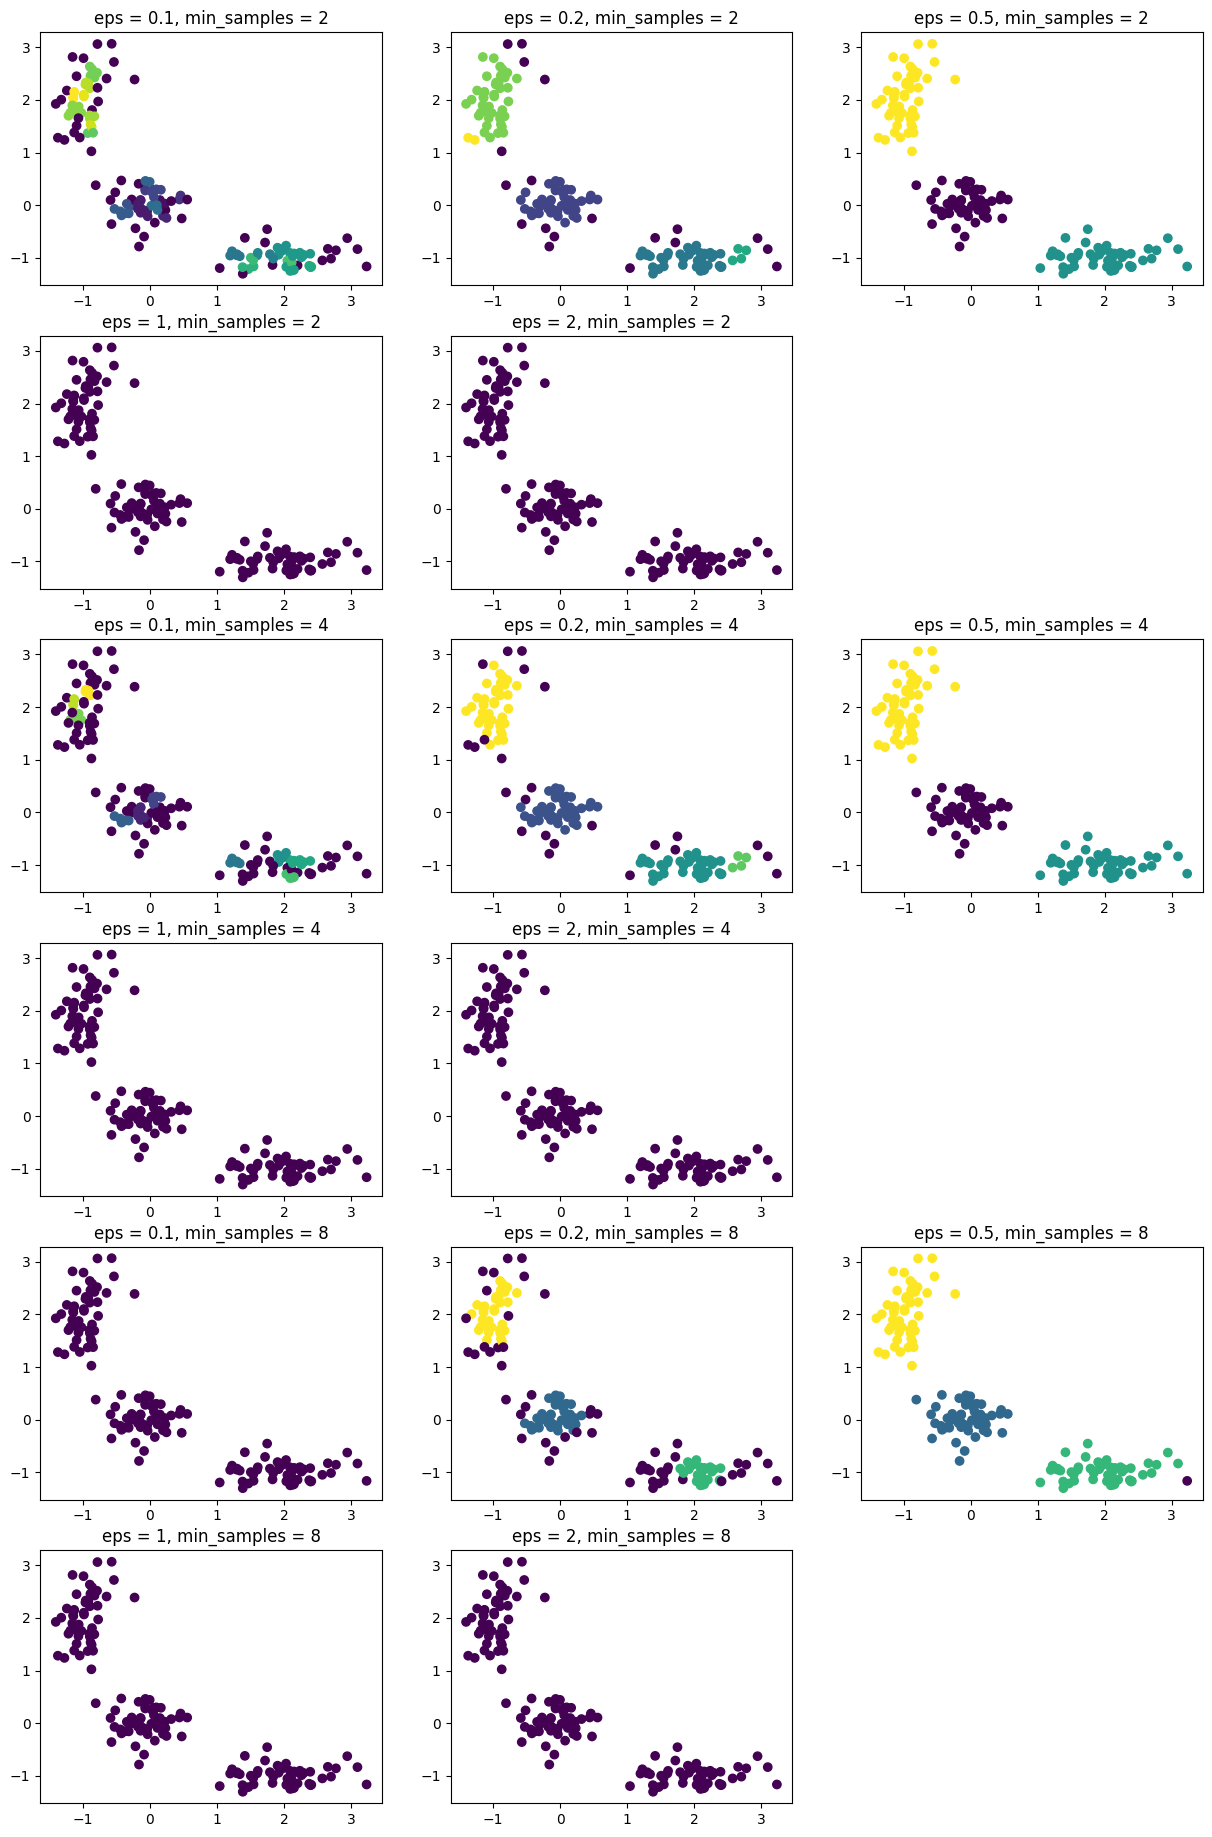

In [6]:
from sklearn.cluster import DBSCAN

plt.figure(figsize= (15,23))
i = 1
for samples in [2, 4, 8]:
    for e in [0.1, 0.2, 0.5, 1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 3, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        try:
            print('eps=',e,'n=',samples,'score:',silhouette_score(X, clusters))
        except ValueError:
            print('eps=',e,'n=',samples,'score:',-1)
        i += 1
    i+=1

plt.show()

[Визуализация работы DBSCAN](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

### Пример: кластеризация игроков NBA

In [7]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

nba = pd.read_csv("https://raw.githubusercontent.com/CaioBrighenti/nba-models/master/season-stats-totals/2019.csv")
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Alex Abrines\abrinal01,SG,25,OKC,31,2,588,56,157,...,0.923,5,43,48,20,17,6,14,53,165
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,123,4,18,...,0.700,3,22,25,8,1,4,4,24,17
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,428,38,110,...,0.778,11,49,60,65,14,5,28,45,108
3,4,Steven Adams\adamsst01,C,25,OKC,80,80,2669,481,809,...,0.500,391,369,760,124,117,76,135,204,1108
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,1913,280,486,...,0.735,165,432,597,184,71,65,121,203,729


In [8]:
nba.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

Применим kmeans с 5ю кластерами только к числовым столбцам (объявим алгоритм и обучим его с помощью метода fit).

In [9]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

numeric_cols = nba._get_numeric_data().dropna(axis=1)

kmeans = KMeans(n_clusters=5, random_state=3)
kmeans.fit(numeric_cols)

KMeans(n_clusters=5, random_state=3)

Визуализируем кластеры.

Посмотрим, какое смысловое значение несут кластеры.

1) Визуализируем точки в осях nba['pts'] (total points) и nba['ast'] (total assistances) и раскрасим их в цвета кластеров.

2) Визуализируем точки в осях nba['age'] (age) и nba['mp'] (minutes played) и раскрасим их в цвета кластеров.

Подпишем оси.

Text(0, 0.5, 'assistances')

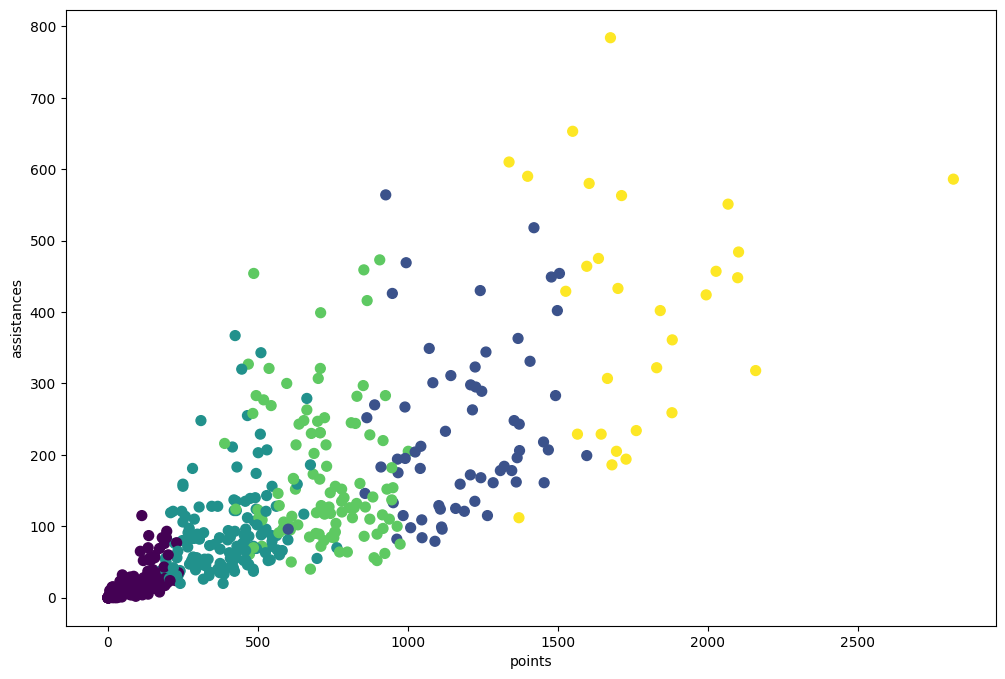

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(nba['PTS'], nba['AST'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('points')
plt.ylabel('assistances')

Text(0, 0.5, 'minutes played')

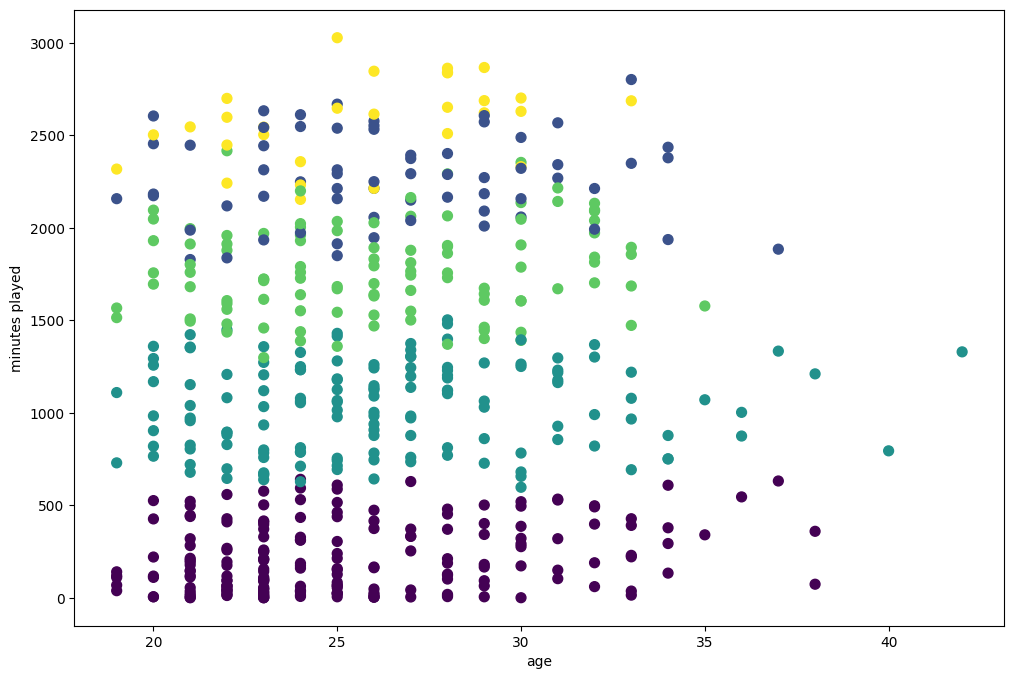

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(nba['Age'], nba['MP'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('age')
plt.ylabel('minutes played')

### Инициализация центроидов

Метод `sklearn.KMeans` содержит параметры `n_init` (число запусков из различных начальных приближений) и `init`. Есть три способа инициализации центроидов:
- `k-means++` – "умная" инициализация центроидов для ускорения сходимости.
- `random` – случайная инициализация центроидов.
- `ndarray` – заданная инициализация центроидов.

## Сжатие изображений с K-means

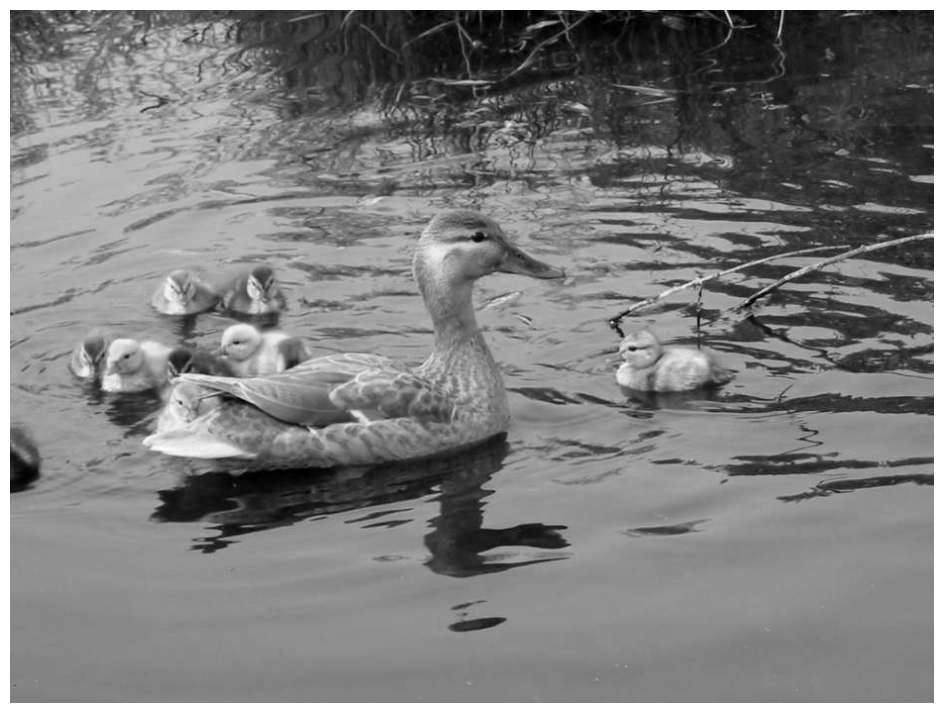

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('duck.jpg')[..., 1]
plt.figure(figsize = (15, 9))
plt.axis('off')
plt.imshow(img, cmap='gray');

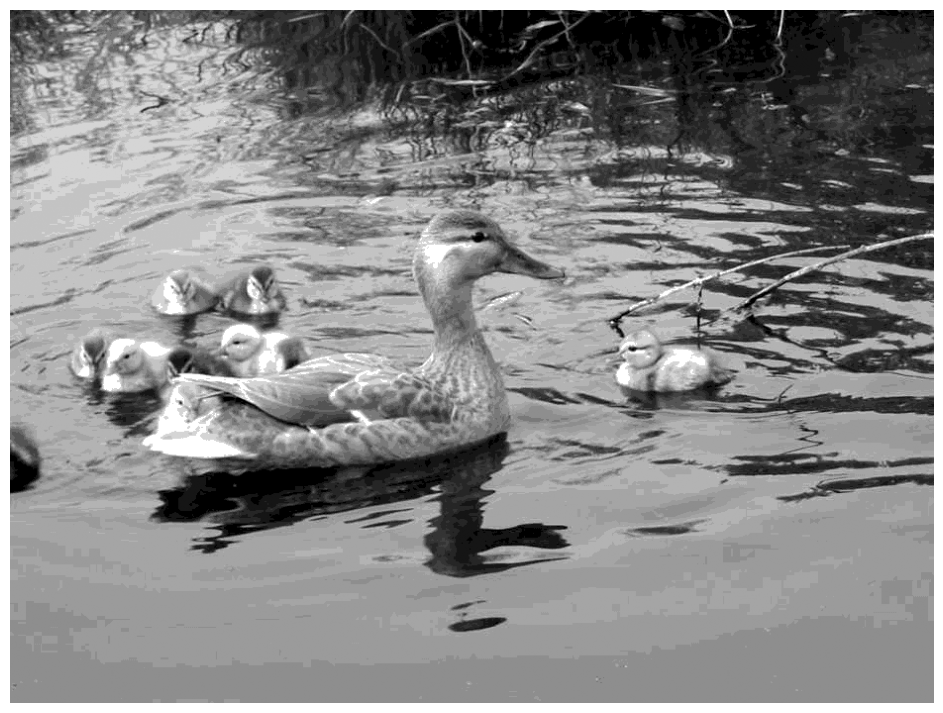

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from scipy.stats import randint

X = img.reshape((-1, 1)) #вытягиваем картинку в вектор
k_means = MiniBatchKMeans(n_clusters=15)
k_means.fit(X)
values = k_means.cluster_centers_ # усредненный цвет
labels = k_means.labels_

img_compressed = values[labels].reshape(img.shape) #возвращаем к размерности исходной картинки

plt.figure(figsize = (15, 9))
plt.axis('off')
plt.imshow(img_compressed, cmap = 'gray');

Возьмите любую фотографию (можно работать с той же) и подберите минимальное число кластеров, которое визуально не ухудшает качество изображения.

In [ ]:
#your code here